In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score

In [243]:
df_heart=pd.read_csv(r"C:\Users\dell\Desktop\Princess Jameela\heart.csv")
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [244]:
#Checking for Shape 
df_heart.shape

(1025, 14)

In [245]:
#Checking for data types
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [246]:
#Checking for null values
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [247]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [248]:
df_heart[df_heart.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


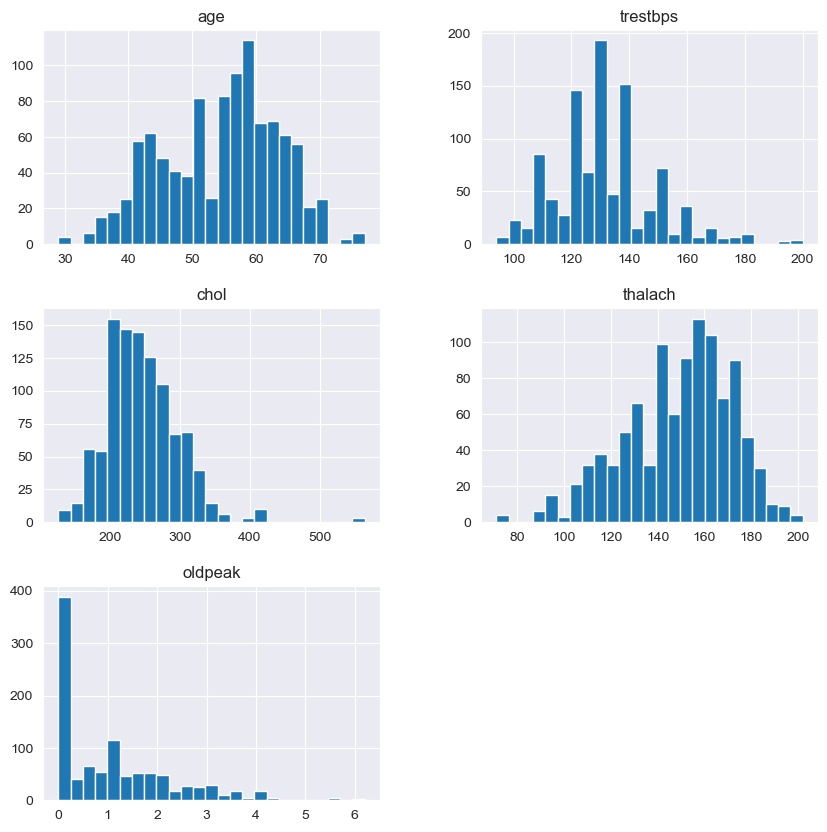

In [249]:
df_heart.hist(column=["age", "trestbps", "chol", "thalach", "oldpeak"],bins=25,figsize=(10,10))
plt.show()

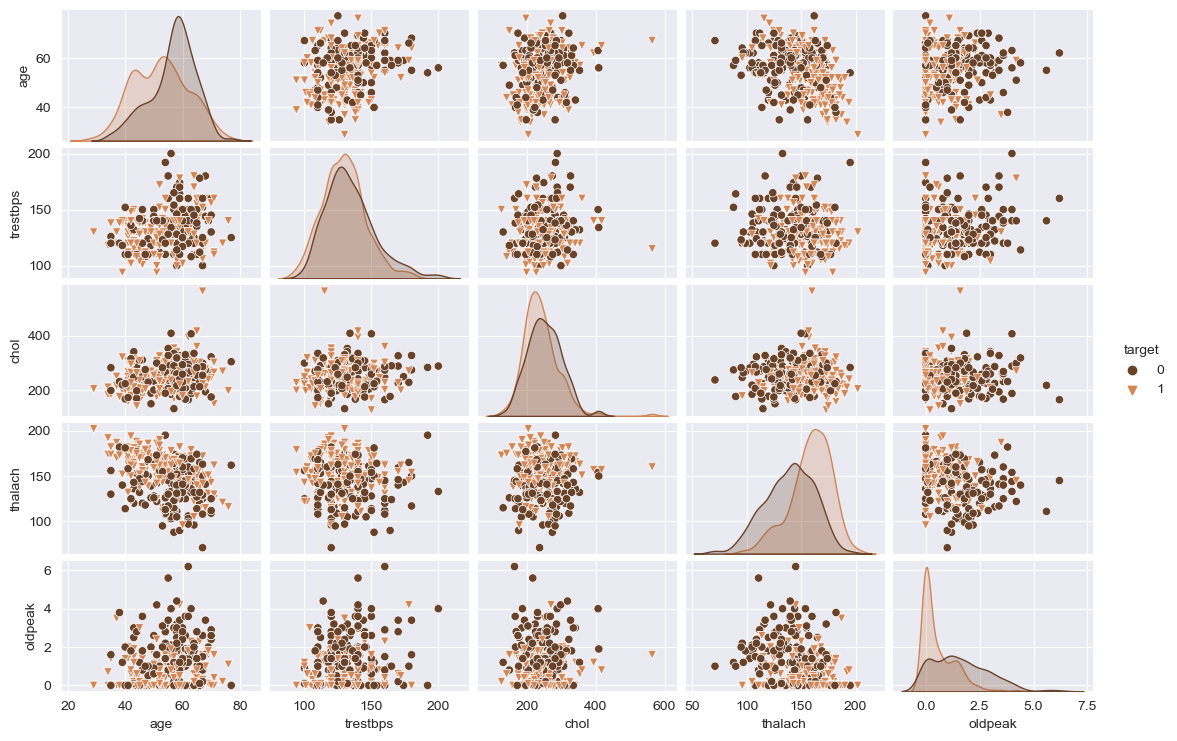

In [250]:
sns.pairplot(df_heart,kind='scatter',vars=["age", "trestbps", "chol", "thalach", "oldpeak"],hue='target',
             markers=['o','v'],palette='copper',height=1.5,aspect=1.5)

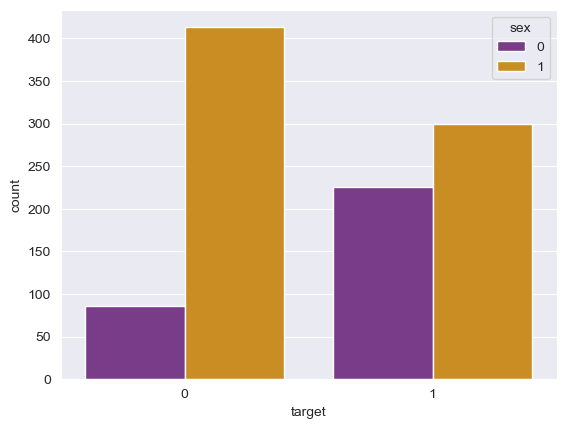

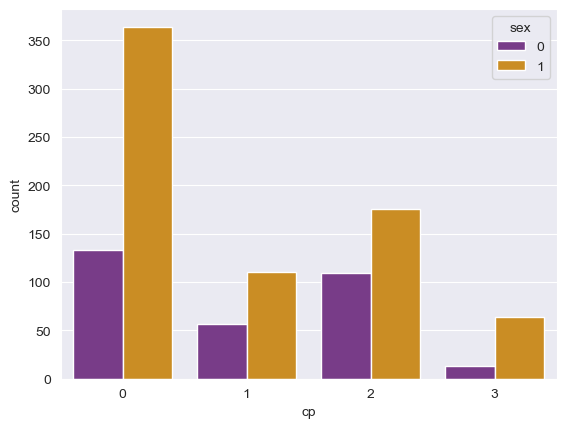

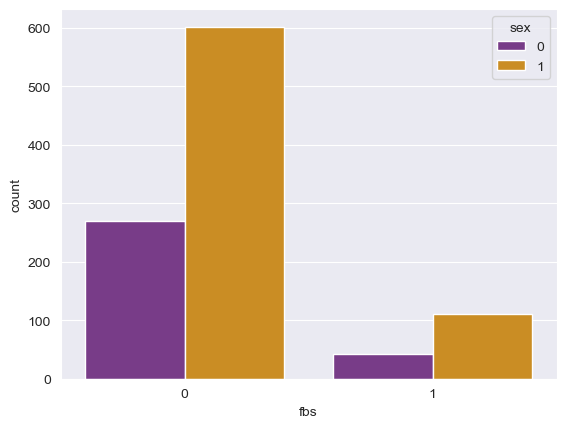

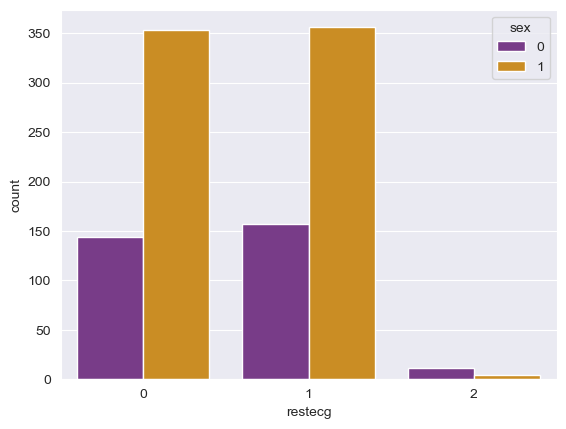

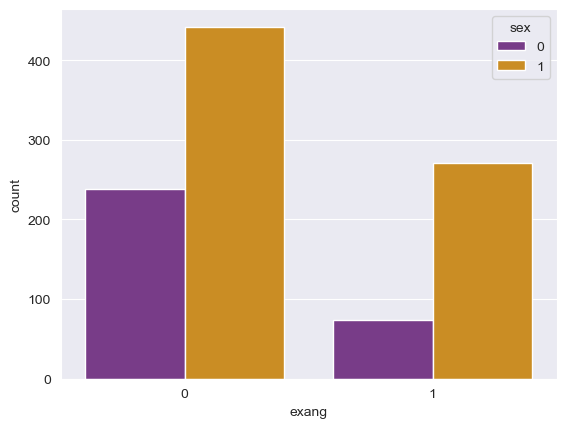

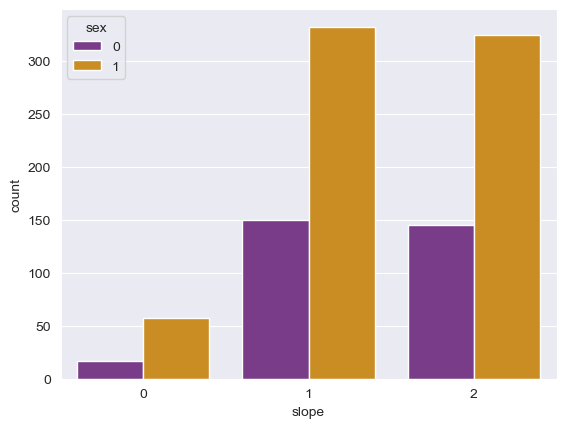

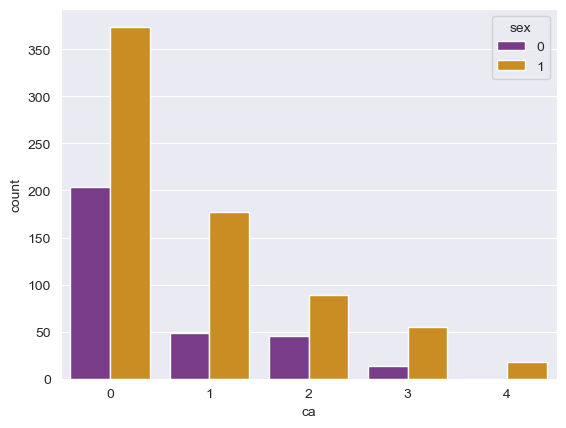

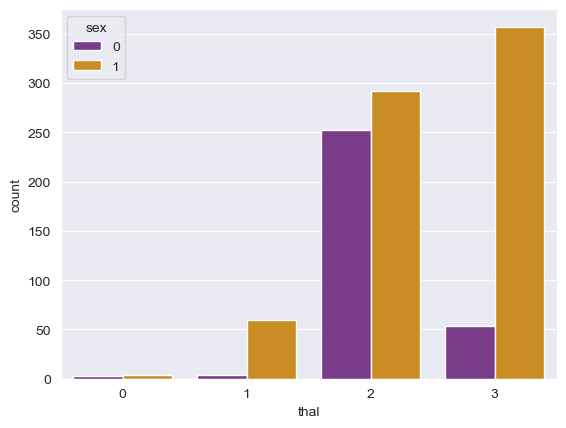

In [251]:
sns.countplot(df_heart,x='target', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='cp', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='fbs', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='restecg', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='exang', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='slope', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='ca', hue="sex",palette='CMRmap')
plt.show()
sns.countplot(df_heart,x='thal', hue="sex",palette='CMRmap')
plt.show()

<Axes: >

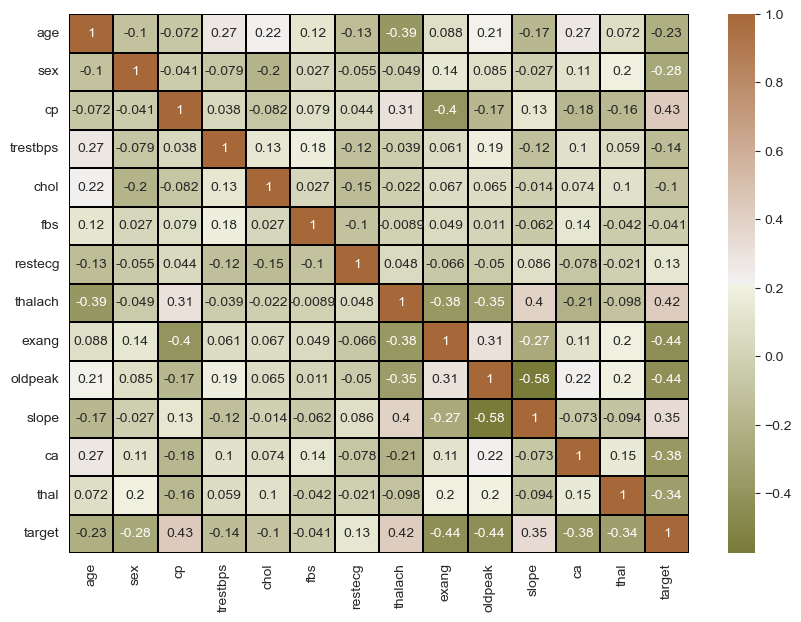

In [252]:
plt.figure(figsize=(10,7))
df_corr=df_heart.corr()
cmap = sns.diverging_palette(87, 36, as_cmap=True)
sns.heatmap(df_corr,cmap=cmap,annot=True,linecolor='black',linewidth=0.2)

# Applying ML Models

In [253]:
X = df_heart.drop('target', axis=1)  
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10)

In [254]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [255]:
log_r = LogisticRegression(random_state=12,max_iter=1000)
cv_scores = cross_val_score(log_r, X, y, cv=5)

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.88292683 0.85853659 0.87804878 0.82439024 0.80487805]


In [256]:
log_r.fit(X_train, y_train)
lr_pred = log_r.predict(X_test)

In [257]:
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_pred))

Accuracy: 0.8585365853658536
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        97
           1       0.84      0.90      0.87       108

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



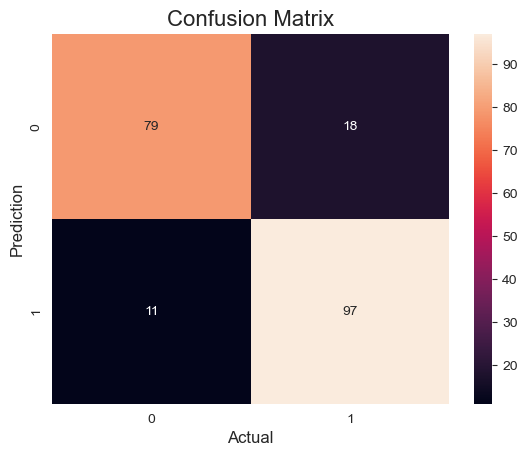

In [258]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_test,lr_pred),
            annot=True,
            fmt='g',
           )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

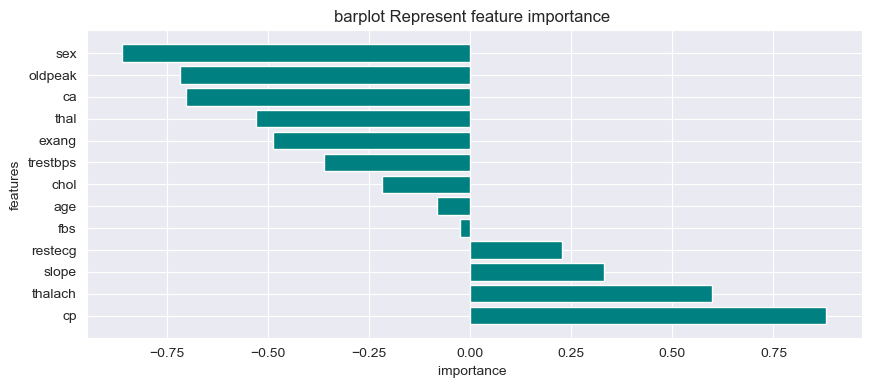

In [259]:
# Feature Selection
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': log_r.coef_[0]})
imp_feature=imp_feature.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'teal',align='center')
plt.show()

In [260]:
#Error Analysis
# Calculate TP, TN, FP, and FN
conf_matrix = confusion_matrix(y_test, lr_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8434782608695652
Recall: 0.8981481481481481
F1 Score: 0.8699551569506726


In [261]:
# Calculate True Negative Rate (Specificity) and False Negative Rate
specificity = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)

print("Specificity:", specificity)
print("False Negative Rate:", false_negative_rate)

Specificity: 0.8144329896907216
False Negative Rate: 0.10185185185185185


### Decision Tree Classifier

In [262]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state=10,max_depth = 6,splitter ='random')
cv_scores = cross_val_score(dt, X, y, cv=3)

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.88304094 0.86549708 0.87096774]


In [263]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [264]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, dt_pred))

Accuracy: 0.8682926829268293
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        97
           1       0.86      0.89      0.88       108

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



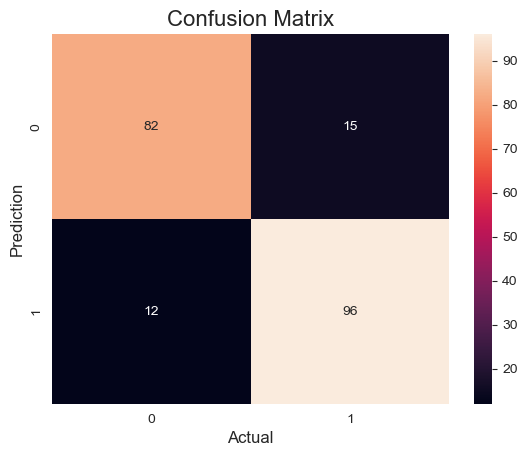

In [265]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_test,dt_pred),
            annot=True,
            fmt='0.2g',
           )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

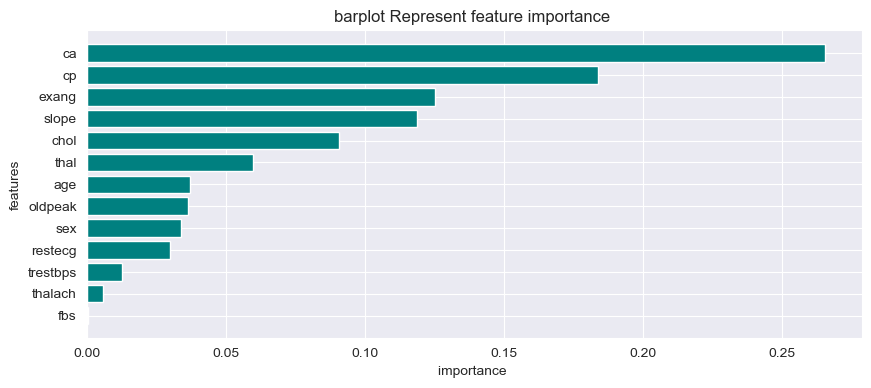

In [266]:
# Feature Selection
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': dt.feature_importances_})
imp_feature=imp_feature.sort_values(by='Importance',ascending=True)
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'teal',align='center')
plt.show()

In [267]:
#Error Analysis
# Calculate TP, TN, FP, and FN
conf_matrix = confusion_matrix(y_test, dt_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8648648648648649
Recall: 0.8888888888888888
F1 Score: 0.8767123287671232


In [268]:
# Calculate True Negative Rate (Specificity) and False Negative Rate
specificity = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)

print("Specificity:", specificity)
print("False Negative Rate:", false_negative_rate)

Specificity: 0.845360824742268
False Negative Rate: 0.1111111111111111


### Random Forest Classifier

In [269]:
rf_classifier = RandomForestClassifier(n_estimators=10,  random_state=10,max_depth=5)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.95121951 0.93170732 0.89756098 0.91707317 0.88292683]


In [270]:
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [271]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy: 0.9219512195121952
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91        97
           1       0.90      0.96      0.93       108

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



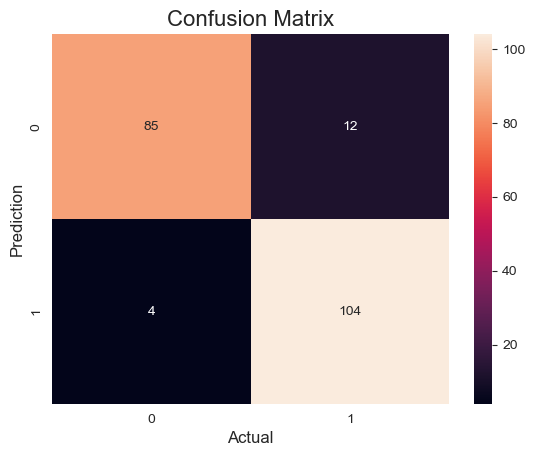

In [272]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_test,rf_pred),
            annot=True,
            fmt='0.3g',
           )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

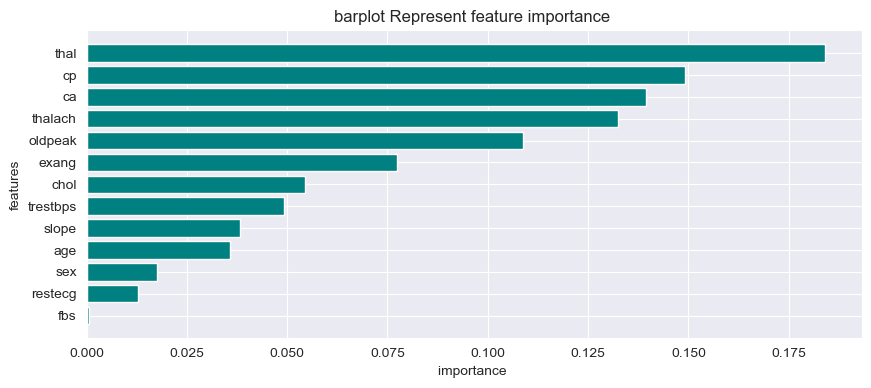

In [273]:
# Feature Selection
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rf_classifier.feature_importances_})
imp_feature=imp_feature.sort_values(by='Importance',ascending=True)
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'teal',align='center')
plt.show()

In [274]:
#Error Analysis
# Calculate TP, TN, FP, and FN
conf_matrix = confusion_matrix(y_test, rf_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.896551724137931
Recall: 0.9629629629629629
F1 Score: 0.9285714285714286


In [275]:
# Calculate True Negative Rate (Specificity) and False Negative Rate
specificity = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)

print("Specificity:", specificity)
print("False Negative Rate:", false_negative_rate)

Specificity: 0.8762886597938144
False Negative Rate: 0.037037037037037035


#### COMPARING ROC CURVES FOR ALL MODELS

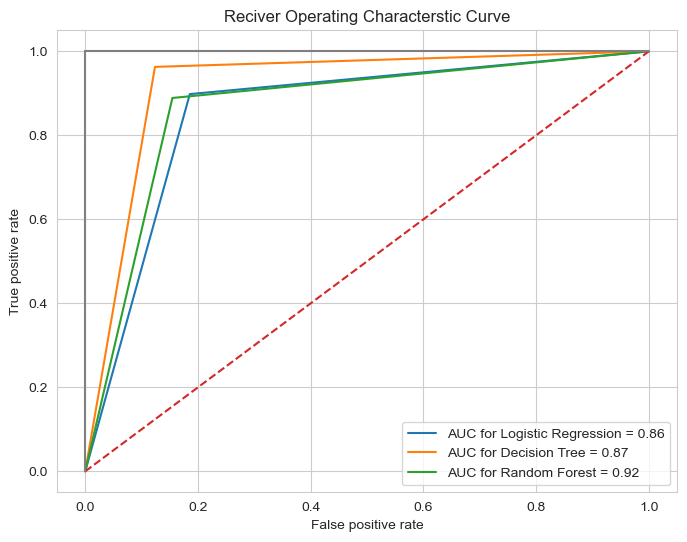

In [276]:
#Calculating AUC
auc_lr = roc_auc_score(y_test, lr_pred)
auc_dt = roc_auc_score(y_test, dt_pred)
auc_rf = roc_auc_score(y_test, rf_pred)

#Calculating ROC
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_pred)                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label=f'AUC for Logistic Regression = {auc_lr:.2f}')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label=f'AUC for Decision Tree = {auc_dt:.2f}')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label=f'AUC for Random Forest = {auc_rf:.2f}')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### APPLYING THE SAME MODELS USING SELECTED FEATURES

In [277]:
X = df_heart.drop(['target','fbs','restecg','sex','exang'], axis=1)  
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 10)

In [278]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [279]:
log_r = LogisticRegression(random_state=22,max_iter=1000)
cv_scores = cross_val_score(log_r, X, y, cv=5)

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.87804878 0.86829268 0.82926829 0.76585366 0.78536585]


In [280]:
log_r.fit(X_train, y_train)
lr_pred = log_r.predict(X_test)

In [281]:
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, lr_pred))

Accuracy: 0.8341463414634146
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        97
           1       0.81      0.90      0.85       108

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



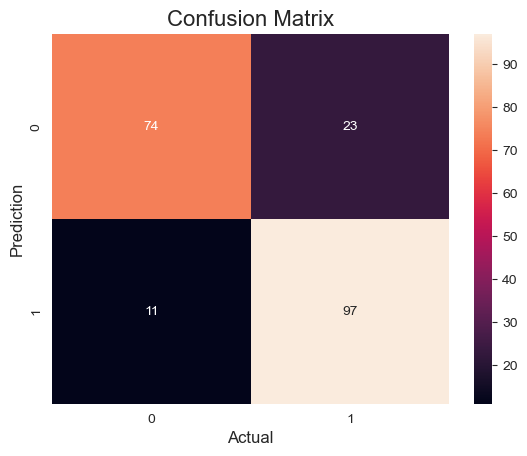

In [282]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_test,lr_pred),
            annot=True,
            fmt='g',
           )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [283]:
#Error Analysis
# Calculate TP, TN, FP, and FN
conf_matrix = confusion_matrix(y_test, lr_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8083333333333333
Recall: 0.8981481481481481
F1 Score: 0.8508771929824561


In [284]:
# Calculate True Negative Rate (Specificity) and False Negative Rate
specificity = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)

print("Specificity:", specificity)
print("False Negative Rate:", false_negative_rate)

Specificity: 0.7628865979381443
False Negative Rate: 0.10185185185185185


### Decision Tree Classifier

In [285]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state=45,max_depth = 6,splitter ='random')
cv_scores = cross_val_score(dt, X, y, cv=5)

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.88292683 0.89756098 0.88292683 0.85853659 0.85853659]


In [286]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [287]:
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, dt_pred))

Accuracy: 0.8878048780487805
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        97
           1       0.88      0.91      0.89       108

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



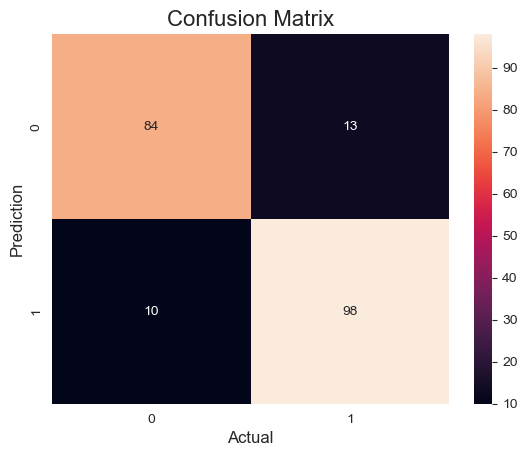

In [288]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_test,dt_pred),
            annot=True,
            fmt='0.2g',
           )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [289]:
#Error Analysis
# Calculate TP, TN, FP, and FN
conf_matrix = confusion_matrix(y_test, dt_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.8828828828828829
Recall: 0.9074074074074074
F1 Score: 0.8949771689497718


In [290]:
# Calculate True Negative Rate (Specificity) and False Negative Rate
specificity = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)

print("Specificity:", specificity)
print("False Negative Rate:", false_negative_rate)

Specificity: 0.865979381443299
False Negative Rate: 0.09259259259259259


### Random Forest Classifier

In [291]:
rf_classifier = RandomForestClassifier(n_estimators=10,  random_state=12,max_depth=5)
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

#Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.92682927 0.91219512 0.93658537 0.89268293 0.89756098]


In [292]:
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [293]:
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy: 0.9073170731707317
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.90      0.93      0.91       108

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



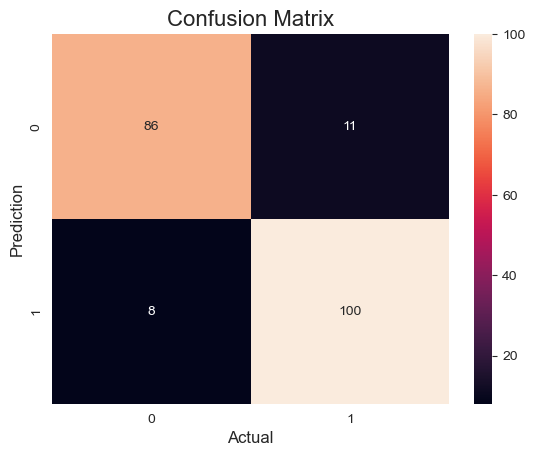

In [294]:
#Plot the confusion matrix.
sns.heatmap(confusion_matrix(y_test,rf_pred),
            annot=True,
            fmt='0.3g',
           )
plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=16)
plt.show()

In [295]:
#Error Analysis
# Calculate TP, TN, FP, and FN
conf_matrix = confusion_matrix(y_test, rf_pred)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate Precision, Recall, and F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: 0.9009009009009009
Recall: 0.9259259259259259
F1 Score: 0.91324200913242


In [296]:
# Calculate True Negative Rate (Specificity) and False Negative Rate
specificity = TN / (TN + FP)
false_negative_rate = FN / (FN + TP)

print("Specificity:", specificity)
print("False Negative Rate:", false_negative_rate)

Specificity: 0.8865979381443299
False Negative Rate: 0.07407407407407407


#### COMPARING ROC CURVES FOR MODIFIED MODELS

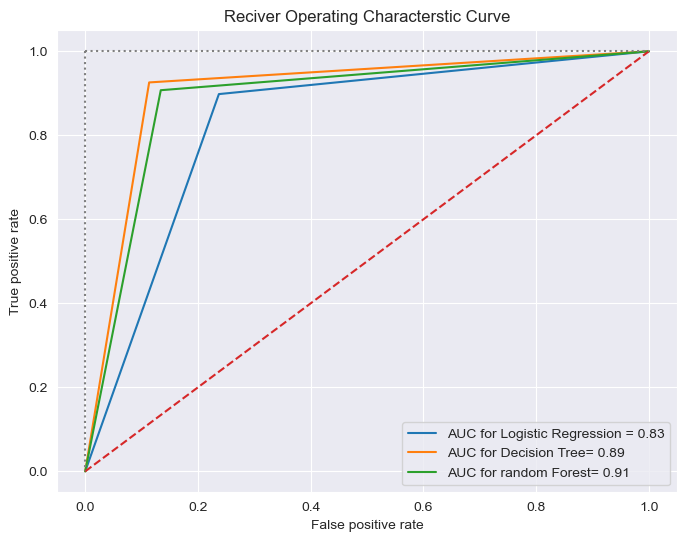

In [297]:
#Calculating AUC
auc_lr = roc_auc_score(y_test, lr_pred)
auc_dt = roc_auc_score(y_test, dt_pred)
auc_rf = roc_auc_score(y_test, rf_pred)

#Calculating ROC
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_pred)                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_pred)


sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label=f'AUC for Logistic Regression = {auc_lr:.2f}')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label=f'AUC for Decision Tree= {auc_dt:.2f}')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label=f'AUC for random Forest= {auc_rf:.2f}')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5',ls=':')
plt.plot([1,1],c='.5',ls='dotted')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## END OF NOTEBOOK